In [29]:
import sys
sys.path.insert(0, '/Users/abertran/Documents/gitRepositories/Steve_notebooks/SteveBobNotebooks/lib')
from capacityHelpers import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)


podName='na6'

file_name=podName+'-cpu-capacity.csv'
dir_name='/Users/abertran/Documents/gitRepositories/Steve_notebooks/SteveBobNotebooks/data/'
data = importArgusTimeSeriesCSV(dir_name+file_name)
data.tail()

#Pick week days and non-holiday days

Populating the interactive namespace from numpy and matplotlib


/Users/abertran/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['percentile']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,"db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}"
Timestamp,,,,,,,,,,,,,,,,
2017-11-27,4.91323,6.27701,5.54615,9.02860,19.343511,4.94171,5.13104,4.76228,4.45180,41.332852,39.046520,60.571251,49.933729,43.567319,57.605011,66.424510
2017-11-28,4.55389,5.64623,5.55333,8.67696,20.742669,4.71555,4.67137,4.48574,4.93808,38.895730,38.433351,50.218001,47.752169,45.989800,54.624940,70.826397
2017-11-29,4.02285,4.90698,5.85213,8.01001,18.746770,4.39038,3.90840,4.02966,4.59562,41.020759,39.403601,53.522661,47.460290,41.417161,55.473091,84.382167
2017-11-30,4.41924,4.67986,5.73460,7.93706,22.566080,4.63187,3.89296,4.06072,4.73692,40.264190,35.264241,52.951501,46.561160,42.365730,59.749280,83.890200
2017-12-01,4.01390,4.72442,5.47812,8.07684,20.856559,4.29983,3.92240,4.19540,5.94325,35.542202,28.980299,51.047741,42.107720,38.607099,47.485300,56.714959


In [55]:
pod = pd.read_csv('/Users/abertran/Documents/gitRepositories/Steve_notebooks/SteveBobNotebooks/lookups/podList.csv')
#mask_pod = (pod['pod'] == podName)
pod.set_index('pod', inplace=True)

numNodes = pod.loc[podName]['servers']
topNodes = numNodes - 1
totalNodes = numNodes * 2
rankLevel = topNodes/totalNodes
#capacity = topNodes * dbCpuCapacity

num_active_servers=numNodes#pod.loc[mask_pod]['servers']
total_servers=data.shape[1]
num_standby=1

IRdate = pod.loc[podName]['IRdate']

holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': getHolidays(start='20-Nov-2016', end=IRdate).strftime('%d-%b-%Y'),
    'lower_window': -1,
    'upper_window': 1,
})

# dbCPU changepoints and reasons
cpd = pod.loc[podName]['cpd'].split(',') if not pd.isnull(pod.loc[podName]['cpd']) else None
cpt = pod.loc[podName]['cpt'].split(',') if not pd.isnull(pod.loc[podName]['cpt']) else None
cpl = {'Title': cpt, 'changeDate': cpd} if not pd.isnull(pod.loc[podName]['cpd']) else None
dbCPUchangePoints = pd.DataFrame(data=cpl).reindex() if not pd.isnull(pod.loc[podName]['cpd']) else None
dbCPUchangePointsAsDate = pd.to_datetime(cpd)
#pd.to_datetime
#type(cpd[0])

Figure out the percentile that applies

In [21]:
percentile = np.round(1 - (num_active_servers-num_standby)/(2*total_servers),2)
#percentile.iloc[0]
#pd.to_numeric(percentile)

In [22]:
middle_active_line = data.quantile(percentile.iloc[0],axis=1)
#len(middle_active_line)
middle_active_line=middle_active_line.dropna()
#q=data.subtract(middle_active_line, axis='columns', fill_value=None)
#q=data-middle_active_line
#imbalance_degree=data-middle_active_line
#imbalance_degree.head()
#type(middle_active_line)
#q=data.ix[:,0:15]-middle_active_line.values
#type(middle_active_line.values)
q=data.subtract(middle_active_line.values, axis='rows', fill_value=None)

#q=data.ix[:,0:15]-middle_active_line.values
#type(data.ix[:,0:15])

In [23]:
q.head(10)

,"db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}"
Timestamp,,,,,,,,,,,,,,,,
2016-12-03,-14.938400,-14.682400,-1.148401,-14.933400,-14.957400,-14.978400,-15.157400,-15.126400,-0.176401,0.075600,3.832600,8.855599,6.539599,-13.582400,-1.030401,-0.756400
2016-12-04,-13.983200,-13.872200,-7.778200,-14.010200,-13.948200,-14.097200,-14.238200,-14.017200,0.781800,-1.824199,2.256800,5.274800,-3.880200,-12.935200,-3.517200,1.461800
2016-12-05,-31.767600,-31.757600,-19.909600,-31.825600,-31.803600,-31.944600,-31.857600,-31.907600,27.323401,0.215400,0.952399,-0.502599,7.098399,-30.680600,-6.500600,-3.857600
2016-12-06,-30.170300,-29.977300,-18.518300,-30.285300,-29.977300,-30.465300,-29.984300,-30.213300,27.348701,-2.281301,0.716701,1.565700,4.153701,-28.767300,-5.070300,-1.672301
2016-12-07,-25.462700,-25.210700,-12.910700,-25.722700,-25.394700,-25.897700,-25.928700,-25.733700,36.853302,-1.498700,-0.175700,5.161300,8.025299,-24.241700,-2.090701,0.075300
2016-12-08,-31.634100,-31.779100,-19.934100,-32.006100,-31.741099,-32.209100,-32.139100,-32.104100,29.422900,8.995901,14.347899,-0.954099,0.408900,-30.089100,-8.299100,-5.207100
2016-12-09,-32.465499,-32.344499,-20.937499,-32.582499,-32.380499,-32.780499,-32.813499,-32.729499,25.746502,7.484501,-7.693499,0.568500,0.985500,-31.170499,-7.064499,-1.326500
2016-12-10,-17.650300,-17.233300,-1.224300,-17.729300,-17.578300,-18.017300,-18.056300,-17.892300,0.669701,7.810699,-2.648300,14.528702,0.524700,-16.266300,-5.249300,-2.671299
2016-12-11,-12.628400,-12.148400,-6.182400,-12.818400,-12.595400,-12.533400,-12.896400,-12.788400,0.159600,1.251600,-0.372400,2.586600,-1.286400,-11.384400,-4.439400,4.808600


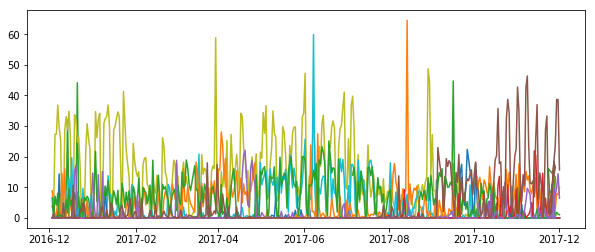

In [24]:
q[q<0]=0
plt.plot(q)

Need to remove weekends and holidays from above

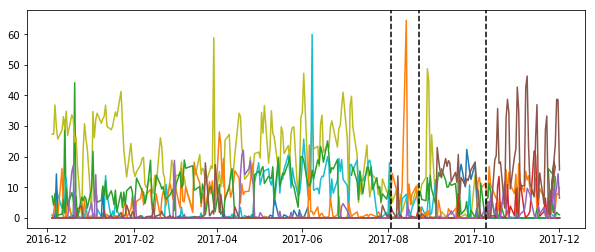

In [25]:
q=q[q.index.dayofweek < 5]
plt.plot(q)
plt.axvline(x='3-Aug-2017',c='black',ls='dashed')
plt.axvline(x='23-Aug-2017',c='black',ls='dashed')
plt.axvline(x='10-Oct-2017',c='black',ls='dashed')

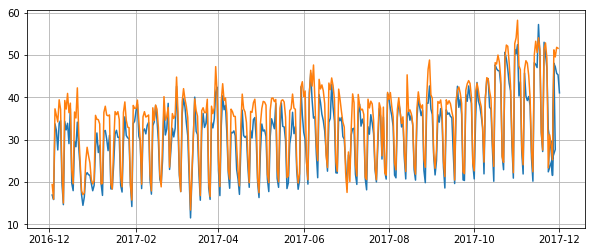

In [62]:
tsCPU = pd.Series.to_frame(getRankedTimeSeries(data, topNodes).sum(axis=1))

plt.plot(middle_active_line)
plt.plot(tsCPU/topNodes)
plt.grid()

tsCPU['ds'] = tsCPU.index
tsCPU.columns = ['y','ds']


#tsCPU.head()




Note: better to do the sum or the average (with the proper host count) as sometimes we will be using the fail over node for some of the capacity.

Pick only the change points in our data

In [69]:
mask=dbCPUchangePointsAsDate<np.max(tsCPU['ds'])
dbCPUchangePointsAsDate = dbCPUchangePointsAsDate[mask]
dbCPUchangePointsAsDate
#tsCPU.tail()

DatetimeIndex(['2017-08-03', '2017-08-23', '2017-10-06', '2017-10-10'], dtype='datetime64[ns]', freq=None)

Let's compare Prophet and quantile regression on different dates.

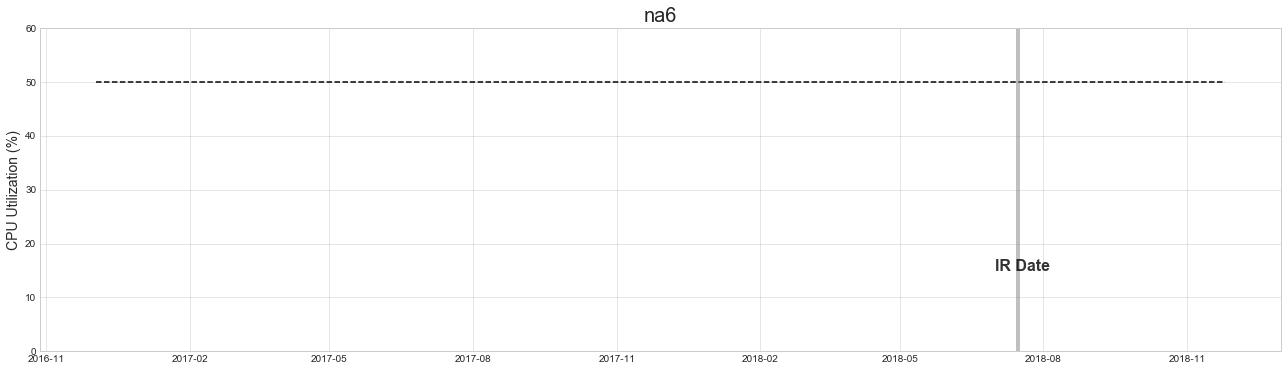

,ds,trend,cap,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,...,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2016-12-03,215.659982,50,215.659982,215.659982,114.736559,172.909075,0.0,0.0,0.0,...,-71.337395,-71.337395,-71.337395,-71.337395,-71.337395,-71.337395,-71.337395,-71.337395,-71.337395,144.322587
1,2016-12-04,215.770590,50,215.770590,215.770590,87.379456,146.626915,0.0,0.0,0.0,...,-98.658518,-98.658518,-98.658518,-98.658518,-98.658518,-98.658518,-98.658518,-98.658518,-98.658518,117.112072
2,2016-12-05,215.881199,50,215.881199,215.881199,222.159675,284.352602,0.0,0.0,0.0,...,36.832247,36.832247,36.832247,36.832247,36.832247,36.832247,36.832247,36.832247,36.832247,252.713446
3,2016-12-06,215.991807,50,215.991807,215.991807,230.175478,288.983565,0.0,0.0,0.0,...,44.107476,44.107476,44.107476,44.107476,44.107476,44.107476,44.107476,44.107476,44.107476,260.099283
4,2016-12-07,216.102416,50,216.102416,216.102416,225.046204,286.572699,0.0,0.0,0.0,...,39.989702,39.989702,39.989702,39.989702,39.989702,39.989702,39.989702,39.989702,39.989702,256.092118


In [76]:
m = Prophet(yearly_seasonality=False,weekly_seasonality=True,daily_seasonality=False,
                holidays=holidays, changepoints=dbCPUchangePointsAsDate)
m.fit(tsCPU)

future = m.make_future_dataframe(periods=360)
future['cap'] = 50
forecast = m.predict(future)
# plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(18,5))
sub1 = m.plot(forecast, uncertainty=True, xlabel='', ylabel='ms', ax=ax)

axes = sub1.get_axes()
axes[0].set_ylabel('CPU Utilization (%)', fontsize=14)
axes[0].set_ylim(0,50*1.2)
axes[0].set_title(podName , fontsize=20)
axes[0].axvline(x=IRdate, c='gray', lw=4, alpha=0.5)
axes[0].text(x=(pd.to_datetime(IRdate) - pd.Timedelta('15 days')), y=15, s='IR Date', color='black', fontsize=16, fontweight='bold', alpha=0.8)

_ = plt.show()

forecast.head()